# Relatório de Análise VII

In [42]:
import pandas as pd

In [43]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [44]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Valor M2,Tipo agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,50.00,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,17.59,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,25.37,Apartamento
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,17.27,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.71,14.71,Apartamento


In [45]:
dados['Valor'].mean()

3465.402299430185

In [46]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']#exemplo
selecao = dados['Bairro'].isin(bairros)#descrevendo quais entradas tem bairros procurados
dados = dados[selecao]#dados agora são os dados com bairros selecionados


In [47]:
dados['Bairro'].drop_duplicates()#removendo duplicatas, sem dar inplace, mantendo também o indice original

5           Copacabana
7      Barra da Tijuca
8               Tijuca
11             Ipanema
14            Botafogo
17              Leblon
105           Flamengo
Name: Bairro, dtype: object

In [48]:
gbairro = dados.groupby('Bairro')#groupby = serve para agrupar por bairro
type(gbairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [49]:
gbairro.groups#esses números representam os indices das entradas procuradas

{'Barra da Tijuca': [7, 13, 19, 21, 24, 31, 44, 47, 51, 56, 60, 70, 81, 84, 86, 89, 98, 100, 114, 116, 118, 124, 130, 139, 142, 161, 167, 168, 177, 180, 182, 186, 207, 209, 220, 222, 227, 233, 254, 267, 273, 275, 281, 285, 290, 292, 300, 325, 326, 327, 328, 331, 339, 349, 350, 351, 359, 365, 373, 379, 381, 411, 412, 413, 418, 421, 423, 424, 446, 449, 451, 456, 469, 483, 486, 498, 500, 507, 528, 530, 532, 534, 542, 544, 547, 550, 560, 566, 584, 591, 593, 594, 596, 600, 601, 606, 608, 614, 615, 625, ...], 'Botafogo': [14, 35, 66, 67, 85, 91, 96, 102, 147, 151, 169, 269, 313, 314, 377, 399, 401, 416, 454, 496, 523, 548, 582, 589, 637, 664, 706, 766, 797, 826, 833, 849, 853, 861, 871, 890, 915, 918, 929, 947, 974, 985, 993, 1003, 1028, 1053, 1077, 1082, 1107, 1153, 1164, 1208, 1247, 1266, 1275, 1299, 1331, 1332, 1365, 1387, 1395, 1397, 1478, 1487, 1507, 1521, 1528, 1535, 1570, 1600, 1603, 1613, 1615, 1616, 1618, 1625, 1665, 1677, 1688, 1706, 1741, 1745, 1783, 1829, 1849, 1857, 1871, 1885, 

In [50]:
for bairro, dados in gbairro:
    print(bairro)
    print(dados)

Barra da Tijuca
                     Tipo           Bairro  Quartos  Vagas  Suites  Area  \
7             Apartamento  Barra da Tijuca        2      1       1    67   
13            Apartamento  Barra da Tijuca        3      3       1   175   
19            Apartamento  Barra da Tijuca        3      1       2    70   
21            Apartamento  Barra da Tijuca        3      2       1   110   
24            Apartamento  Barra da Tijuca        3      1       1    72   
...                   ...              ...      ...    ...     ...   ...   
18781  Casa de Condomínio  Barra da Tijuca        5      2       5   554   
18783  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
18784  Casa de Condomínio  Barra da Tijuca        5      3       4   450   
19392           Quitinete  Barra da Tijuca        1      1       0    35   
19795           Quitinete  Barra da Tijuca        1      1       1    20   

         Valor  Condominio    IPTU  Valor m2  Valor M2 Tipo agregado  


In [51]:
for bairro, data in gbairro: 
    print('{} -> {}'.format(bairro, data.Valor.mean()))#metodo meio desagradável de fazer

Barra da Tijuca -> 5500.497783032811
Botafogo -> 3375.4605418138985
Copacabana -> 3351.519427402863
Flamengo -> 3220.119266055046
Ipanema -> 5451.549307253464
Leblon -> 5661.45393258427
Tijuca -> 1999.9380127620784


In [52]:
gbairro[['Valor','Condominio']].mean().round(2)#método mais eficiente

,Valor,Condominio
Bairro,,
Barra da Tijuca,5500.50,3588.23
Botafogo,3375.46,939.98
Copacabana,3351.52,1039.22
Flamengo,3220.12,933.88
Ipanema,5451.55,1674.58
Leblon,5661.45,1617.80
Tijuca,1999.94,713.43


# Estatísticas descritivas

In [53]:
gbairro['Valor'].describe().round(2)#.describe(), descreve estatísticas gerais do dataset

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3383.0,5500.50,5123.02,800.0,2400.0,3700.0,6700.0,32000.0
Botafogo,849.0,3375.46,2015.90,700.0,2200.0,3000.0,4250.0,22000.0
Copacabana,2445.0,3351.52,1904.58,100.0,1915.0,2900.0,4200.0,9900.0
Flamengo,654.0,3220.12,1958.30,800.0,1800.0,2700.0,4000.0,9500.0
Ipanema,1227.0,5451.55,2093.76,1200.0,3759.0,5500.0,7000.0,9900.0
Leblon,890.0,5661.45,2746.71,100.0,3900.0,5000.0,7000.0,30000.0
Tijuca,1097.0,1999.94,1039.67,750.0,1500.0,1800.0,2300.0,19000.0


In [54]:
gbairro['Valor'].aggregate(['min','max','sum']).round(2).rename(columns = {'min':'Minimo','max':'Maximo','sum':'Soma'})#aggregate serve para juntar dados pela estatistica

,Minimo,Maximo,Soma
Bairro,,,
Barra da Tijuca,800.0,32000.0,18608184.0
Botafogo,700.0,22000.0,2865766.0
Copacabana,100.0,9900.0,8194465.0
Flamengo,800.0,9500.0,2105958.0
Ipanema,1200.0,9900.0,6689051.0
Leblon,100.0,30000.0,5038694.0
Tijuca,750.0,19000.0,2193932.0


In [55]:
%matplotlib inline#necessário para funcionar no jupyter
import matplotlib.pyplot as plt#convenção
plt.rc('figure', figsize = (20,10))#convenção

Text(0.5, 1.0, 'Desvio padrão do valor dos imóveis')

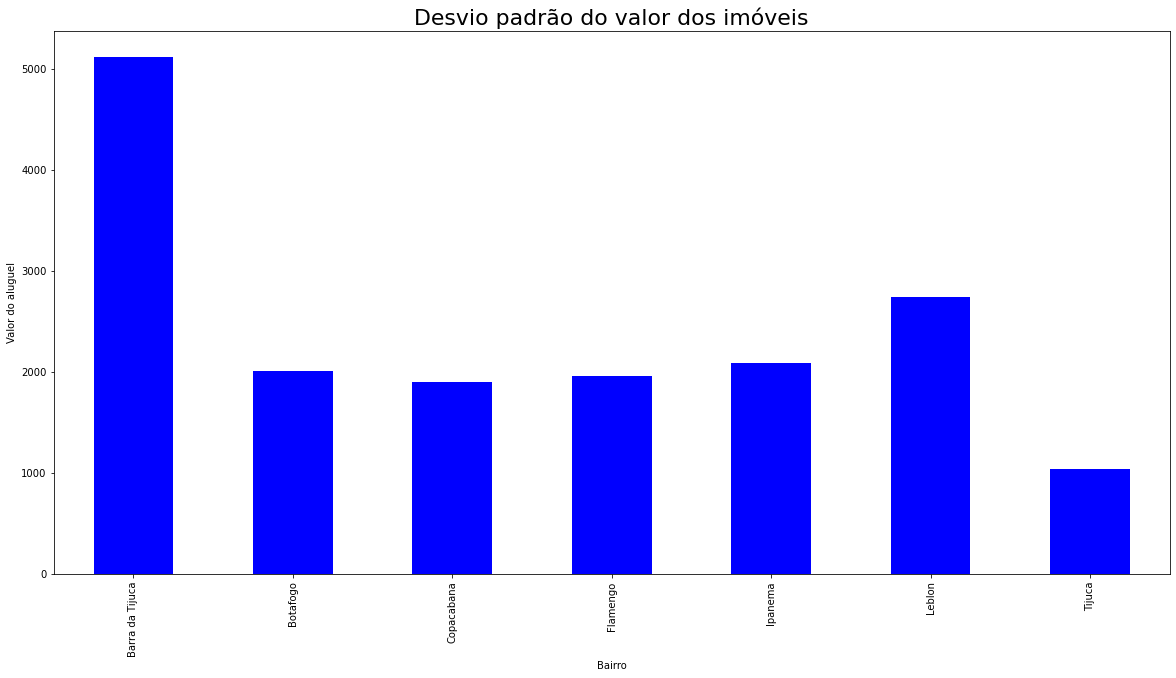

In [58]:
fig = gbairro['Valor'].std().round(2).plot.bar(color = 'blue')#concatenamos informações do gráfico que queremos fazer
fig.set_ylabel('Valor do aluguel')#selecionando o eixo y
fig.set_title('Desvio padrão do valor dos imóveis',{'fontsize':22})#selecionando o titulo

Text(0.5, 1.0, 'Media do valor dos imóveis')

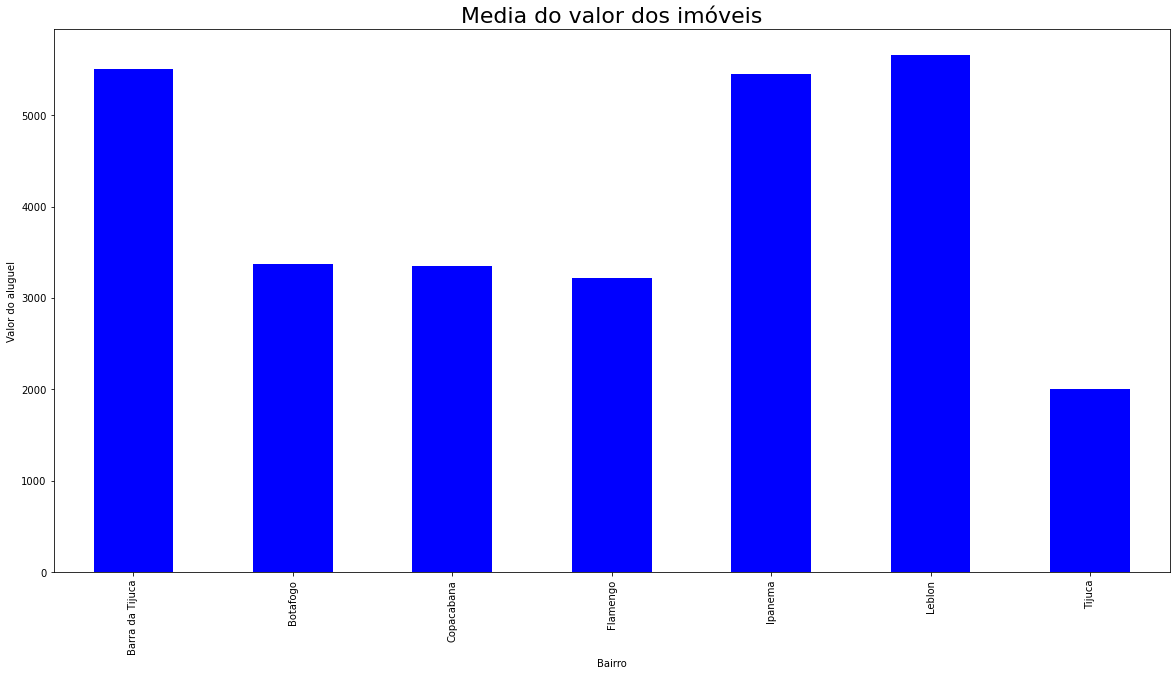

In [61]:
fig = gbairro['Valor'].mean().round(2).plot.bar(color = 'blue')#professor sugeriu deixar isso salvo e reutilizar quando for necessário
fig.set_ylabel('Valor do aluguel')
fig.set_title('Media do valor dos imóveis',{'fontsize':22})

Text(0.5, 1.0, 'Valor maximo dos imóveis')

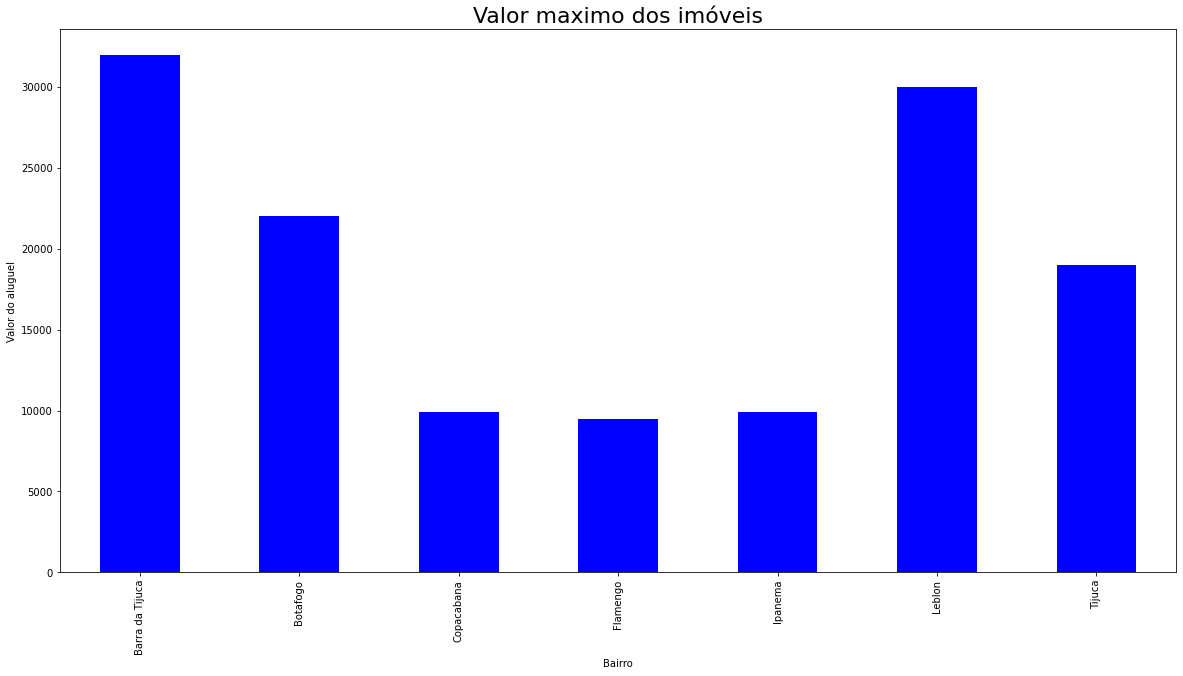

In [62]:
fig = gbairro['Valor'].max().round(2).plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor maximo dos imóveis',{'fontsize':22})